# Summary
Make figures for the three datasets.

In [48]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
plt.rcParams['svg.fonttype'] = 'none'  # default is 'path' which converts text to path, 'none' keeps text as text
# note: this might cause some interpreters of svgs to not be able to load them though

## Known links

In [6]:
base_kl = '/home/louwe015/NPLinker/known_links_dict_{}.pickle'
known_links_datasets = []
datasets = ['crusemann', 'MSV000084950', 'MSV000084771']
for dataset in datasets:
    known_links_datasets.append(pickle.load(open(base_kl.format(dataset), 'rb')))

In [7]:
known_links_datasets

[{'staurosporine': {'hits': [[1, 2], [3, 11]], 'counts': (100, 16)},
  'rosamicin': {'hits': [[1, 8], [1, 8]], 'counts': (275, 38)},
  'desferrioxamine': {'hits': [[1, 1],
    [4, 4],
    [5, 5],
    [5, 5],
    [9, 9],
    [10, 10]],
   'counts': (2967, 1480)},
  'rifamycin': {'hits': [[152, 257]], 'counts': (856, 478)},
  'lomaiviticin': {'hits': [[30, 381]], 'counts': (635, 66)},
  'arenimycin': {'hits': [[1, 1]], 'counts': (103, 12)},
  'enterocin': {'hits': [[1, 4]], 'counts': (664, 74)},
  'salinamide': {'hits': [[1, 1], [41, 85]], 'counts': (621, 237)},
  'cyclomarin': {'hits': [[3, 4], [3, 4], [3, 4], [3, 4]],
   'counts': (558, 335)},
  'retimycin': {'hits': [], 'counts': None, 'not_found': 'no spectrum found'},
  'actinomycin': {'hits': [[1, 1], [1, 1]], 'counts': (756, 333)}},
 {'anabaenopeptin': {'hits': [[2, 3], [5, 9], [16, 28]], 'counts': (33, 21)},
  'micropeptin': {'hits': [],
   'counts': (50, 31),
   'not_found': 'not in metcalf'},
  'kawaguchipeptin': {'hits': [[1, 

In [18]:
# overview
found = []
no_found = []
no_spectrum = []
no_metcalf = []

for i, dataset in enumerate(datasets):
    i_found = 0
    i_no_found = 0
    i_no_spectrum = 0
    i_no_metcalf = 0
    for k,v in known_links_datasets[i].items():
        if v['hits']:
            i_found += 1
        elif v['not_found']:
            if v['not_found'] == 'not identified':
                i_no_found += 1
            elif v['not_found'] == 'no spectrum found':
                i_no_spectrum += 1
            elif v['not_found'] == 'not in metcalf':
                i_no_metcalf += 1
    found.append(i_found)
    no_found.append(i_no_found)
    no_spectrum.append(i_no_spectrum)
    no_metcalf.append(i_no_metcalf)

found, no_found, no_spectrum, no_metcalf

{'hits': [], 'counts': None, 'not_found': 'no spectrum found'}
{'hits': [], 'counts': (50, 31), 'not_found': 'not in metcalf'}
{'hits': [], 'counts': (50, 27), 'not_found': 'not in metcalf'}
{'hits': [], 'counts': (652, 338), 'not_found': 'not identified'}
{'hits': [], 'counts': (378, 234), 'not_found': 'no spectrum found'}
{'hits': [], 'counts': (208, 130), 'not_found': 'not in metcalf'}
{'hits': [], 'counts': (231, 99), 'not_found': 'not in metcalf'}
{'hits': [], 'counts': (564, 272), 'not_found': 'not in metcalf'}


([10, 4, 4], [0, 0, 1], [1, 0, 1], [0, 2, 3])

In [28]:
df_kl = pd.DataFrame({'Identified': found,
                      'Not in Metcalf': no_metcalf,
                      'Not identified': no_found,
                      'Spectrum absent': no_spectrum},
                  index=['Crüsemann']+datasets[1:])
df_kl

,Identified,Not in Metcalf,Not identified,Spectrum absent
Crüsemann,10,0,0,1
MSV000084950,4,2,0,0
MSV000084771,4,3,1,1


In [43]:
df_kl.loc["Total"] = df_kl.sum()
df_kl

,Identified,Not in Metcalf,Not identified,Spectrum absent
Crüsemann,10,0,0,1
MSV000084950,4,2,0,0
MSV000084771,4,3,1,1
Total,18,5,1,2


In [131]:
23/24, 23/26, 18/26

(0.9583333333333334, 0.8846153846153846, 0.6923076923076923)

In [134]:
9637 /3

3212.3333333333335

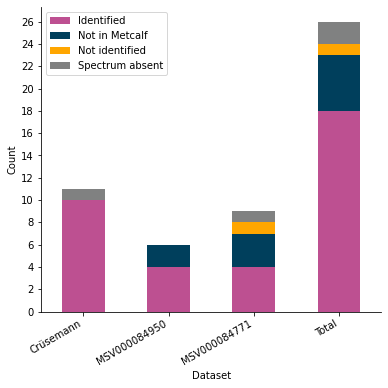

In [65]:
inch = 2.54
df_kl.plot(kind='bar', stacked=True, color=['#BD5091', '#003F5C', '#ffa600', '#808181'], figsize=(6.1, 5.6))
plt.xticks(rotation=30, horizontalalignment="right")
sns.despine()
plt.yticks(np.arange(0, 28, 2.0))
plt.xlabel('Dataset')
plt.ylabel('Count')
figout = "/home/louwe015/NPLinker/known_links_barplot.svg"
plt.savefig(figout)

## Cutoffs

In [66]:
# save xs
xs_base = '/home/louwe015/NPLinker/filtered_data_{}.pickle'
xs_list = []
for dataset in datasets:
    xs_list.append(pickle.load(open(xs_base.format(dataset), 'rb')))

In [69]:
len(xs_list)

3

In [82]:
labels = ['Crüsemann']+datasets[1:]
label_links = 'links'
label_filtered = 'filtered links'
lab_dataset = []
lab_f_links = []
xs_unlist = []
for i, xs in enumerate(xs_list):
    mean_x0 = np.mean(xs[0])
    xs_unlist += xs[0]
    mean_x1 = np.mean(xs[1])
    xs_unlist += xs[1]
    len_links = len(xs[0])
    len_filt = len(xs[1])
    lab_f_links += [label_links for _ in range(len_links)]
    lab_f_links += [label_filtered for _ in range(len_filt)]
    lab_dataset += [labels[i] for _ in range(len_links+len_filt)]

In [83]:
df = pd.DataFrame({'Data links': xs_unlist,
                   'Filtered label': lab_f_links,
                   'Dataset': lab_dataset})
df

,Data links,Filtered label,Dataset
0,498,links,Crüsemann
1,498,links,Crüsemann
2,498,links,Crüsemann
3,498,links,Crüsemann
4,498,links,Crüsemann
...,...,...,...
4125,0,filtered links,MSV000084771
4126,9,filtered links,MSV000084771
4127,6,filtered links,MSV000084771
4128,0,filtered links,MSV000084771


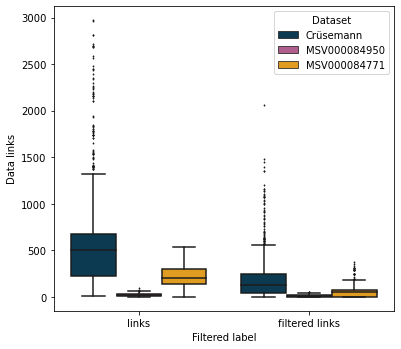

In [92]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6.1, 5.6))
sns.boxplot(x = 'Filtered label',
            y = 'Data links',
            data = df,
            hue = 'Dataset',
            palette = ['#003f5c', '#bc5090', '#ffa600'],
            flierprops={"markersize": 1})
figout = "/home/louwe015/NPLinker/filtered_links_boxplot.svg"
plt.savefig(figout)

In [97]:
labels = ['Crüsemann']+datasets[1:]
label_links = 'links'
label_filtered = 'filtered links'
lab_dataset = []
lab_f_links = []
xs_unlist = []
for i, xs in enumerate(xs_list):
    mean_xs = np.mean(xs[0]+xs[1])
    xs_unlist += [x/mean_xs for x in xs[0]]
    xs_unlist += [x/mean_xs for x in xs[1]]
    len_links = len(xs[0])
    len_filt = len(xs[1])
    lab_f_links += [label_links for _ in range(len_links)]
    lab_f_links += [label_filtered for _ in range(len_filt)]
    lab_dataset += [labels[i] for _ in range(len_links+len_filt)]

In [98]:
df_norm = pd.DataFrame({'Number of links per GCF': xs_unlist,
                        'Filtered label': lab_f_links,
                        'Dataset': lab_dataset})
df_norm

,Number of links per GCF,Filtered label,Dataset
0,1.370300,links,Crüsemann
1,1.370300,links,Crüsemann
2,1.370300,links,Crüsemann
3,1.370300,links,Crüsemann
4,1.370300,links,Crüsemann
...,...,...,...
4125,0.000000,filtered links,MSV000084771
4126,0.066501,filtered links,MSV000084771
4127,0.044334,filtered links,MSV000084771
4128,0.000000,filtered links,MSV000084771


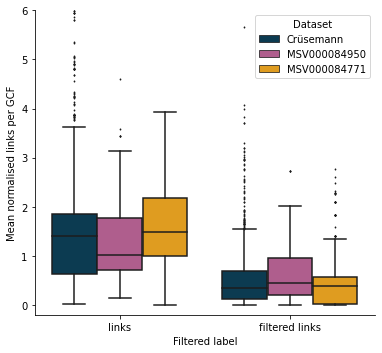

In [105]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6.1, 5.6))
ax = sns.boxplot(x = 'Filtered label',
            y = 'Number of links per GCF',
            data = df_norm,
            hue = 'Dataset',
            palette = ['#003f5c', '#bc5090', '#ffa600'],
            flierprops={"markersize": 1})
sns.despine()
plt.setp(ax, ylim=(-.2,6), ylabel='Mean normalised links per GCF')
figout = "/home/louwe015/NPLinker/filtered_links_boxplot_normalised.svg"
plt.savefig(figout)

In [126]:
# take percentage wise difference between each GCF to show

labels = ['Crüsemann']+datasets[1:]
xs_diff = []
xs_diff_unlist = []
xs_diff_labels = []
for i, xs in enumerate(xs_list):
    fraction_diff = [x0 if x0 == 0 else (x1-x0)/x0*100 for x0, x1 in zip(*xs)]
    xs_diff.append(fraction_diff)
    xs_diff_unlist.extend(fraction_diff)
    xs_diff_labels.extend([labels[i] for _ in range(len(fraction_diff))])
len(xs_diff), len(xs_diff[0]), len(xs_diff_unlist), len(xs_diff_labels)

(3, 1581, 2065, 2065)

In [ ]:
# add total

In [127]:
df_diff = pd.DataFrame({'links': xs_diff_unlist,
                        'Dataset': xs_diff_labels})
df_diff

,links,Dataset
0,-63.855422,Crüsemann
1,-29.718876,Crüsemann
2,-63.855422,Crüsemann
3,-63.855422,Crüsemann
4,-63.855422,Crüsemann
...,...,...
2060,-100.000000,MSV000084771
2061,-93.918919,MSV000084771
2062,-95.555556,MSV000084771
2063,0.000000,MSV000084771


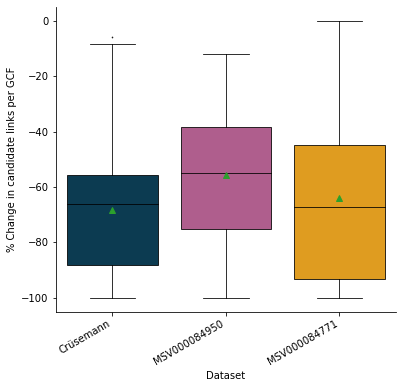

In [130]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6.1, 5.6))
x = 0.8
ax = sns.boxplot(x = 'Dataset',
            y = 'links',
            data = df_diff,
            palette = ['#003f5c', '#bc5090', '#ffa600'],
            showmeans=True,
            flierprops={"markersize": x},
            boxprops={"edgecolor": "black", "linewidth": x},
            medianprops={"color": "black", "linewidth": x},
            whiskerprops={"color": "black", "linewidth": x},
            capprops={"color": "black", "linewidth": x})
plt.xticks(rotation=30, horizontalalignment="right")
sns.despine()
plt.setp(ax, ylabel='% Change in candidate links per GCF')
figout = "/home/louwe015/NPLinker/filtered_links_boxplot_differences.svg"
plt.savefig(figout)